# Prerequisites

In [1]:
import os, sys

import numpy as np
import tqdm
import torch

/home/marco/miniconda3/envs/nlp2022-hw3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Important paths for the notebook:

In [2]:
app_root = '../../../../'
test_name = 'test1'
datasets_path = os.path.join(app_root, 'data')
model_dir_path = os.path.join(app_root, 'model', test_name)

data_train_path = os.path.join(datasets_path, 'train.tsv')
data_dev_path = os.path.join(datasets_path, 'dev.tsv')

In [3]:
sys.path.append('../../../')

%load_ext autoreload
%autoreload 2

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

Setting the seed for reproducibility:

In [4]:
SEED = 28

# random.seed(SEED) # not used
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [5]:
global_params = {
    'batch_size': 32,
    'PAD_TOKEN': '<pad>',
    'UNK_TOKEN': '<unk>',
    'transformer_name': "bert-base-cased",
    'mention_tags': {
        'p_open':  '<P>', 'p_close':  '</P>', 
        'e_open':  '<E>', 'e_close':  '</E>', 
    },
}

In [6]:
import torch
t_out = torch.as_tensor([
    [ [1.,1.,2.], [1.,2.,2.], [1.,3.,2.], [1.,4.,2.], [1.,5.,2.], [1.,6.,2.] ],
    [ [2.,1.,2.], [2.,2.,2.], [2.,3.,2.], [2.,4.,2.], [2.,5.,2.], [2.,6.,2.] ],
])

t_p = torch.as_tensor([
    [ 0,0,1,0,0,0 ],
    [ 0,0,0,0,0,1 ],
])
t_re = t_out * t_p.unsqueeze(-1)
t_re

tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [1., 3., 2.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [2., 6., 2.]]])

In [7]:
torch.sum(t_out * t_p.unsqueeze(-1), dim=-2, keepdim=False)

tensor([[1., 3., 2.],
        [2., 6., 2.]])

# Dataset

In [8]:
from stud.modelsTests.dataset.Dataset_transformer_simple import Dataset_transformer_simple

In [9]:
dataset_train = Dataset_transformer_simple(
    data_train_path, 
    tokenizer = global_params['transformer_name'],
    split_by_entities = True)

dataset_dev = Dataset_transformer_simple(
    data_dev_path, 
    tokenizer = global_params['transformer_name'],
    split_by_entities = True)

In [10]:
dataset_train.data_raw[14]

{'id': 'train-15',
 'text': "Twenty years ago, Lorenzo Uribe discovered true love with Maria Herrera and began a romance. Lorenzo was rich, married, and had a young son: Lautaro. Maria was poor and unknown to Lorenzo, had a daughter called Renata. Maria's mother, Gracia, wanted her daughter to catch this rich man at all costs and convinced her that pregnancy would assure this.",
 'pron': 'her',
 'p_offset': 250,
 'entity_A': 'Maria',
 'offset_A': 219,
 'is_coref_A': 'TRUE',
 'entity_B': 'Gracia',
 'offset_B': 235,
 'is_coref_B': 'FALSE'}

In [11]:
dataset_train.data_raw[6]

{'id': 'train-7',
 'text': "Reb Chaim Yaakov's wife is the sister of Rabbi Moishe Sternbuch, as is the wife of Rabbi Meshulam Dovid Soloveitchik, making the two Rabbis his uncles. Reb Asher's brother Rabbi Shlomo Arieli is the author of a critical edition of the novallae of Rabbi Akiva Eiger. Before his marriage, Rabbi Arieli studied in the Ponevezh Yeshiva headed by Rabbi Shmuel Rozovsky, and he later studied under his father-in-law in the Mirrer Yeshiva.",
 'pron': 'his',
 'p_offset': 273,
 'entity_A': 'Reb Asher',
 'offset_A': 152,
 'is_coref_A': 'FALSE',
 'entity_B': 'Akiva Eiger',
 'offset_B': 253,
 'is_coref_B': 'FALSE'}

In [12]:
for i,e in enumerate(dataset_train.data_raw):
    if e['is_coref_A'] == e['is_coref_B'] and e['is_coref_A'] == 'FALSE':
        print(i)

6
15
17
28
31
33
45
46
49
55
67
78
80
88
92
97
99
101
112
114
121
122
141
155
178
180
190
200
223
233
239
244
254
256
279
334
335
340
348
349
350
357
368
374
376
394
399
404
406
412
417
426
428
438
452
486
500
504
513
528
529
531
534
540
557
564
581
632
656
661
668
675
687
720
732
733
745
784
815
833
834
838
847
872
873
882
885
900
905
915
917
923
926
936
941
968
982
984
988
996
998
1005
1006
1012
1043
1046
1088
1103
1109
1130
1146
1151
1160
1163
1170
1173
1180
1182
1183
1194
1230
1235
1237
1239
1243
1248
1251
1252
1259
1260
1261
1264
1270
1272
1282
1289
1290
1298
1304
1307
1331
1374
1390
1396
1408
1426
1461
1470
1499
1506
1531
1546
1559
1566
1576
1581
1582
1607
1618
1619
1625
1629
1631
1633
1638
1641
1643
1682
1694
1702
1703
1729
1744
1746
1750
1752
1753
1755
1776
1810
1818
1828
1836
1840
1856
1862
1869
1911
1919
1921
1925
1931
1937
1948
1949
1951
1961
1983
1985
1986
1990
2011
2028
2041
2049
2071
2082
2099
2106
2116
2120
2122
2123
2128
2134
2154
2156
2182
2186
2187
2190
2192
2196
2226

In [13]:
# Testing both entities as FALSE (pass (None, None)):

i_test = 6

ex_sample = (
    (dataset_train.data_raw[i_test]['pron'], dataset_train.data_raw[i_test]['p_offset']),
    (None, None),
)
ex_label = dataset_train.data_raw[i_test]
print(ex_sample)
ex_label

(('his', 273), (None, None))


{'id': 'train-7',
 'text': "Reb Chaim Yaakov's wife is the sister of Rabbi Moishe Sternbuch, as is the wife of Rabbi Meshulam Dovid Soloveitchik, making the two Rabbis his uncles. Reb Asher's brother Rabbi Shlomo Arieli is the author of a critical edition of the novallae of Rabbi Akiva Eiger. Before his marriage, Rabbi Arieli studied in the Ponevezh Yeshiva headed by Rabbi Shmuel Rozovsky, and he later studied under his father-in-law in the Mirrer Yeshiva.",
 'pron': 'his',
 'p_offset': 273,
 'entity_A': 'Reb Asher',
 'offset_A': 152,
 'is_coref_A': 'FALSE',
 'entity_B': 'Akiva Eiger',
 'offset_B': 253,
 'is_coref_B': 'FALSE'}

In [14]:
from collections import Counter
c = Counter()
for s in dataset_train:
    for e in s['entities']:
        c[e['is_coref']] += 1
c

Counter({'TRUE': 2684, 'FALSE': 3314})

In [15]:
global_params.update({ 
    'token_embeddings_len': len(dataset_train.tokenizer),
    'resize_token_embeddings': False, # ! not used
})

In [16]:
np.save(os.path.join(model_dir_path, 'global_params.npy'), global_params)

# Dataloader

In [17]:
from torch.utils.data import DataLoader

In [18]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
num_workers = 4

In [19]:
dataloader_train = DataLoader(
    dataset_train,
    batch_size=global_params['batch_size'],
    collate_fn=dataset_train.create_collate_fn(),
    num_workers=num_workers,
    shuffle=True,
)

dataloader_dev = DataLoader(
    dataset_dev,
    batch_size=global_params['batch_size'],
    collate_fn=dataset_dev.create_collate_fn(),
    num_workers=num_workers,
    shuffle=False,
)

In [20]:
print(dataloader_dev.dataset[0]['text'].split(' ')[46])

him


In [21]:
dataloader_dev.dataset[0]

{'id': 'validation-1_0',
 'text': 'He admitted making four trips to China and playing golf there. He also admitted that ZTE officials, whom he says are his golf buddies, hosted and paid for the trips. Jose de Venecia III, son of House Speaker Jose de Venecia Jr, alleged that Abalos offered him US$10 million to withdraw his proposal on the NBN project.',
 'pron': 'him',
 'p_offset': 256,
 'p_position': 46,
 'entities': [{'entity': 'Jose de Venecia Jr',
   'offset': 208,
   'is_coref': 'FALSE'}]}

In [22]:
for e in dataloader_dev:
    ex_in = e
    break

In [23]:
ex_in.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'words_ids', 'pron_ids', 'pron_mask', 'entity_ids', 'entity_mask', 'binary_is_coref'])

In [24]:
print(ex_in['input_ids'][0][:120], ex_in['input_ids'].shape)
print(ex_in['entity_mask'][0][:120],  ex_in['entity_ids'][0])
print(ex_in['pron_mask'][0][:120],  ex_in['pron_ids'][0])

tensor([  101,  1124,  4120,  1543,  1300,  9185,  1106,  1975,  1105,  1773,
         7135,  1175,   119,  1124,  1145,  4120,  1115,   163, 12880,  3878,
          117,  2292,  1119,  1867,  1132,  1117,  7135,   171, 22940,  1905,
          117,  3567,  1105,  3004,  1111,  1103,  9185,   119,  7438,  1260,
          159,  7582,  6052,  2684,   117,  1488,  1104,  1585,  9911,  7438,
         1260,   159,  7582,  6052,  3108,   117,  6351,  1115,   138,  7767,
         2155,  2356,  1140,  1646,   109,  1275,  1550,  1106, 10570,  1117,
         5835,  1113,  1103,   151,  2064,  2249,  1933,   119,   102,  1140,
         7438,  1260,   159,  7582,  6052,  3108,   102,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0]) torch.Size([32, 139])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [25]:
print(ex_in['words_ids'][0])
print(ex_in['binary_is_coref'][0])

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 25, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 36, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 45, 45, 46, 47, 48, 49, 50, 50, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 63, 63, 64, 65, -1, 0, 1, 2, 3, 3, 3, 4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
tensor([0.])


# Printing model

In [26]:
from stud.modelsTests.utils.print_infos import print_summary, display_history, plot_confusion_matrix, print_classification_report

# Fine-tuning the model

In [27]:
from stud.modelsTests.model_3.model3_transformer_simple import Model3
import torch.optim as optim

loss_function = torch.nn.BCELoss()

final_model = Model3(
    device = device,
    loss_fn = loss_function,
    model_load_weights = False,
    fine_tune_transformer = False,
)

optimizer = optim.SGD(final_model.model.parameters(), lr=0.0016, momentum=0.9)
# optimizer = optim.Adam(model.parameters(), lr=0.0016)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [28]:
freeze_some = True
if freeze_some:
    unfreeze_word_embeddings = False
    unfreeze_transformer_layers = True
    unfreeze_from_layer_num = 8
    unfreeze_to_layer_num = 99
    unfreeze_pooler = True

    for name, param in final_model.model.named_parameters():

        if name.startswith('transformer_model.embeddings'):
            param.requires_grad = unfreeze_word_embeddings

        elif name.startswith('transformer_model.encoder.layer'):
            layer_num = int(name.split('.')[3])
            if layer_num >= unfreeze_from_layer_num and layer_num <= unfreeze_to_layer_num:
                param.requires_grad = unfreeze_transformer_layers
            else:
                param.requires_grad = False

        elif name.startswith('transformer_model.pooler'):
            param.requires_grad = unfreeze_pooler
        
        print(param.requires_grad, name)

False transformer_model.embeddings.word_embeddings.weight
False transformer_model.embeddings.position_embeddings.weight
False transformer_model.embeddings.token_type_embeddings.weight
False transformer_model.embeddings.LayerNorm.weight
False transformer_model.embeddings.LayerNorm.bias
False transformer_model.encoder.layer.0.attention.self.query.weight
False transformer_model.encoder.layer.0.attention.self.query.bias
False transformer_model.encoder.layer.0.attention.self.key.weight
False transformer_model.encoder.layer.0.attention.self.key.bias
False transformer_model.encoder.layer.0.attention.self.value.weight
False transformer_model.encoder.layer.0.attention.self.value.bias
False transformer_model.encoder.layer.0.attention.output.dense.weight
False transformer_model.encoder.layer.0.attention.output.dense.bias
False transformer_model.encoder.layer.0.attention.output.LayerNorm.weight
False transformer_model.encoder.layer.0.attention.output.LayerNorm.bias
False transformer_model.encoder.

In [29]:
print_summary(final_model.model)

Model3_net(
  (transformer_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_a

In [30]:
# import re

# position = 522
# text = "As Emperor Taizong of Tang wanted to enter into an alliance with Xueyantuo against Eastern Tujue, he sent the general Qiao Shiwang (***) as an envoy to Yi'nan, recognizing him the Zhenzhupiqie Khan (or Zhenzhu Khan in short), and awarding him with drums and banners. Yi'nan was very pleased, and he offered tribute to Emperor Taizong. It was said that by this point, <P>his</P> territory stretched from the Mohe to the east, Western Tujue to the west, and Gobi Desert to the south, and that many tribes, including Huige, Bayegu, Adie (**), Tongluo (**), Pugu (**), and Xi (*), all submitted to him."
# word = 'Adie (**'
# regex_subs = r"" + re.escape('<X>') + word + re.escape('</X>')
# re.sub(re.escape(word), regex_subs, text[position:],1)

In [31]:
ex_in_simple = dataset_train.create_collate_fn()([dataset_train[0], dataset_train[1], dataset_train[2]])
predictions = final_model.model(
    input_ids = ex_in_simple['input_ids'].to(device), 
    attention_mask = ex_in_simple['attention_mask'].to(device),
    token_type_ids = ex_in_simple['token_type_ids'].to(device),
    entity_mask = ex_in_simple['entity_mask'].to(device),
    pron_mask = ex_in_simple['pron_mask'].to(device),
)
labels = ex_in_simple['binary_is_coref'].to(device)

print(labels)
print(predictions)
print(final_model.model.compute_loss(predictions, labels ))

tensor([[1.],
        [0.],
        [1.]], device='cuda:0')
tensor([[0.4999],
        [0.5001],
        [0.5003]], device='cuda:0', grad_fn=<SigmoidBackward>)
tensor(0.6930, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)


In [32]:
# os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
print(final_model.predict(dataset_train.data_raw[0]))

(('her', 274), (None, None))


In [33]:
history = {}

In [34]:
from stud.modelsTests.utils.Trainer_model3_transformer_simple import Trainer_model3_transformer_simple

trainer = Trainer_model3_transformer_simple()

history = trainer.train(
    final_model, optimizer, dataloader_train, dataloader_dev,
    epochs=60, device=device,
    save_best=True, 
    min_score=0.7,
    save_path_name=os.path.join(model_dir_path, 'model3_weights_transformer_simple.pth'),
    saved_history=history
)

Epoch   0 => avg_loss: 0.690733
#               Validation loss => 0.686515 | accuracy: 0.136564 #
Epoch   1 => avg_loss: 0.687412
#               Validation loss => 0.683969 | accuracy: 0.140969 #
Epoch   2 => avg_loss: 0.686254
#               Validation loss => 0.682590 | accuracy: 0.140969 #
Epoch   3 => avg_loss: 0.685161
#               Validation loss => 0.681604 | accuracy: 0.140969 #
Epoch   4 => avg_loss: 0.683379
#               Validation loss => 0.680313 | accuracy: 0.149780 #
Epoch   5 => avg_loss: 0.681610
#               Validation loss => 0.679438 | accuracy: 0.145374 #
Epoch   6 => avg_loss: 0.680030
#               Validation loss => 0.678744 | accuracy: 0.149780 #
Epoch   7 => avg_loss: 0.675701
#               Validation loss => 0.673853 | accuracy: 0.154185 #
Epoch   8 => avg_loss: 0.665911
#               Validation loss => 0.664338 | accuracy: 0.167401 #
Epoch   9 => avg_loss: 0.643505
#               Validation loss => 0.645484 | accuracy: 0.229075 #
Epoch  10 

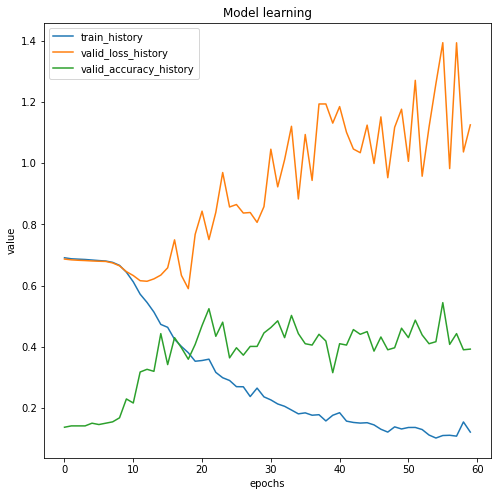

In [35]:
display_history(history)